In [14]:
# Load the train dataset
with open('train.txt', 'r') as file:
    train_data = file.readlines()

# Load the validation dataset
with open('val.txt', 'r') as file:
    valid_data = file.readlines()

# Load the test dataset
with open('test.txt', 'r') as file:
    test_data = file.readlines()

# Display the first few lines of each dataset
print("Train Dataset:")
print(train_data[:5])  # Display the first 5 lines

print("\nValidation Dataset:")
print(valid_data[:5])

print("\nTest Dataset:")
print(test_data[:5])


Train Dataset:
['i didnt feel humiliated;sadness\n', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n', 'im grabbing a minute to post i feel greedy wrong;anger\n', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n', 'i am feeling grouchy;anger\n']

Validation Dataset:
['im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n', 'i feel like i am still looking at a blank canvas blank pieces of paper;sadness\n', 'i feel like a faithful servant;love\n', 'i am just feeling cranky and blue;anger\n', 'i can have for a treat or if i am feeling festive;joy\n']

Test Dataset:
['im feeling rather rotten so im not very ambitious right now;sadness\n', 'im updating my blog because i feel shitty;sadness\n', 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her;sadness\n', 'i left with my bouquet of red and yellow

In [19]:
pip install gensim


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load your data and labels
def load_data_and_labels(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(';')
            data.append(parts[0])
            labels.append(parts[1])
    return data, labels

train_data, train_labels = load_data_and_labels('train.txt')
valid_data, valid_labels = load_data_and_labels('val.txt')
test_data, test_labels = load_data_and_labels('test.txt')

# Preprocess your data (You can use the same preprocessing function)
def preprocess_data(data):
    preprocessed_data = []
    for text in data:
        # Your preprocessing steps here
        preprocessed_data.append(preprocess_text(text))
    return preprocessed_data

# Define your preprocessing function as you mentioned earlier
def preprocess_text(text):
    # Your preprocessing steps here
    return text

# Preprocess your data
train_data = preprocess_data(train_data)
valid_data = preprocess_data(valid_data)
test_data = preprocess_data(test_data)

# Apply TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data)
X_valid_tfidf = tfidf_vectorizer.transform(valid_data)
X_test_tfidf = tfidf_vectorizer.transform(test_data)

# Perform feature selection using chi-squared
k = 1000  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_tfidf, train_labels)  # Use train_labels
X_valid_selected = selector.transform(X_valid_tfidf)
X_test_selected = selector.transform(X_test_tfidf)

# Hyperparameter Tuning: Find the best alpha value for Multinomial Naive Bayes
alphas = [0.1, 1.0, 10.0]
best_accuracy = 0.0
best_alpha = 0.0

for alpha in alphas:
    naive_bayes_classifier = MultinomialNB(alpha=alpha)
    naive_bayes_classifier.fit(X_train_selected, train_labels)
    valid_predictions = naive_bayes_classifier.predict(X_valid_selected)
    validation_accuracy = accuracy_score(valid_labels, valid_predictions)
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_alpha = alpha

# Train the model with the best alpha
best_naive_bayes = MultinomialNB(alpha=best_alpha)
best_naive_bayes.fit(X_train_selected, train_labels)

# Evaluate the model on the validation set
valid_predictions = best_naive_bayes.predict(X_valid_selected)
validation_accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))

# Evaluate the model on the test set
test_predictions = best_naive_bayes.predict(X_test_selected)
test_accuracy = accuracy_score(test_labels, test_predictions)  # Use test_labels
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Validation Accuracy: 82.75%
Test Accuracy: 83.10%


In [31]:
from sklearn.svm import SVC
C_values = [0.1, 1.0, 10.0]
best_svm_accuracy = 0.0
best_C = 0.0

for C_value in C_values:
    svm_classifier = SVC(C=C_value)
    svm_classifier.fit(X_train_selected, train_labels)
    valid_predictions = svm_classifier.predict(X_valid_selected)
    validation_accuracy = accuracy_score(valid_labels, valid_predictions)
    if validation_accuracy > best_svm_accuracy:
        best_svm_accuracy = validation_accuracy
        best_C = C_value

# Train the SVM model with the best C value
best_svm = SVC(C=best_C)
best_svm.fit(X_train_selected, train_labels)



# Evaluate the best SVM model on the validation set
valid_predictions = best_svm.predict(X_valid_selected)
validation_accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation Accuracy (SVM): {:.2f}%".format(validation_accuracy * 100))


# Evaluate the best SVM model on the test set
test_predictions = best_svm.predict(X_test_selected)
test_accuracy_svm = accuracy_score(test_labels, test_predictions)
print("Test Accuracy (SVM): {:.2f}%".format(test_accuracy_svm * 100))

Validation Accuracy (SVM): 89.65%
Test Accuracy (SVM): 89.00%


In [32]:
# Train a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_selected, train_labels)
# Evaluate the Logistic Regression model on the validation set
valid_predictions_lr = logistic_regression_classifier.predict(X_valid_selected)
validation_accuracy_lr = accuracy_score(valid_labels, valid_predictions_lr)
print("Validation Accuracy (Logistic Regression): {:.2f}%".format(validation_accuracy_lr * 100))
# Evaluate the Logistic Regression model on the test set
test_predictions_lr = logistic_regression_classifier.predict(X_test_selected)
test_accuracy_lr = accuracy_score(test_labels, test_predictions_lr)
print("Test Accuracy (Logistic Regression): {:.2f}%".format(test_accuracy_lr * 100))

Validation Accuracy (Logistic Regression): 88.00%
Test Accuracy (Logistic Regression): 88.30%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


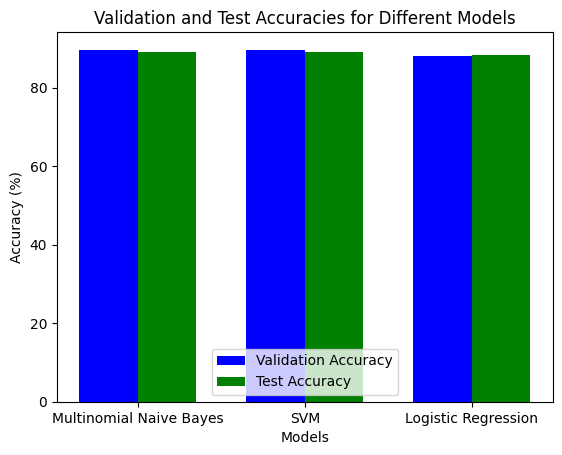

In [33]:
import matplotlib.pyplot as plt

# Define the models and their corresponding validation and test accuracies
models = ['Multinomial Naive Bayes', 'SVM', 'Logistic Regression']
validation_accuracies = [validation_accuracy * 100, best_svm_accuracy * 100, validation_accuracy_lr * 100]
test_accuracies = [test_accuracy * 100, test_accuracy_svm * 100, test_accuracy_lr * 100]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the models
indices = range(len(models))

# Create bar charts for validation accuracies
plt.bar(indices, validation_accuracies, bar_width, label='Validation Accuracy', color='b')

# Create bar charts for test accuracies
plt.bar([i + bar_width for i in indices], test_accuracies, bar_width, label='Test Accuracy', color='g')

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in indices], models)

# Set the legend
plt.legend()

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Validation and Test Accuracies for Different Models')

# Show the bar chart
plt.show()
